In [1]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
#from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

We will use these datasets : 

https://www.kaggle.com/datasets/mloey1/ahdd1

https://www.kaggle.com/datasets/mloey1/ahcd1

# I. Data Exploration

### 1. Loading Arabic Letters Dataset

In [2]:
# Training letters images and labels files
letters_training_images_file_path = "Arabic Handwritten Characters Dataset CSV/training images.zip"
letters_training_labels_file_path = "Arabic Handwritten Characters Dataset CSV/training labels.zip"
# Testing letters images and labels files
letters_testing_images_file_path = "Arabic Handwritten Characters Dataset CSV/testing images.zip"
letters_testing_labels_file_path = "Arabic Handwritten Characters Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_letters_images = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing arabic letter images of 64x64 pixels." %testing_letters_images.shape[0])
#training_letters_images.head()

There are 13440 training arabic letter images of 64x64 pixels.
There are 3360 testing arabic letter images of 64x64 pixels.


### 2. Loading Arabic Digits Dataset

In [3]:
# Training digits images and labels files
digits_training_images_file_path = "Arabic Handwritten Digits Dataset CSV/training images.zip"
digits_training_labels_file_path = "Arabic Handwritten Digits Dataset CSV/training labels.zip"
# Testing digits images and labels files
digits_testing_images_file_path = "Arabic Handwritten Digits Dataset CSV/testing images.zip"
digits_testing_labels_file_path = "Arabic Handwritten Digits Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_digits_images = pd.read_csv(digits_training_images_file_path, compression='zip', header=None)
training_digits_labels = pd.read_csv(digits_training_labels_file_path, compression='zip', header=None)
testing_digits_images = pd.read_csv(digits_testing_images_file_path, compression='zip', header=None)
testing_digits_labels = pd.read_csv(digits_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic digit images of 64x64 pixels." %training_digits_images.shape[0])
print("There are %d testing arabic digit images of 64x64 pixels." %testing_digits_images.shape[0])

There are 60000 training arabic digit images of 64x64 pixels.
There are 10000 testing arabic digit images of 64x64 pixels.


### 3. Convert csv values to an image 
Writting a method to be used later if we want visualization of an image from its pixels values.

In [4]:
def convert_values_to_image(image_values, display=False):
    image_array = np.asarray(image_values)
    image_array = image_array.reshape(64, 64).astype('uint8')
    # The original dataset is reflected so we will flip it then rotate for a better view only.
    image_array = np.flip(image_array, 0)
    image_array = rotate(image_array, -90)
    new_image = Image.fromarray(image_array)
    if display == True:
        new_image.show()
    return new_image

### 4. Visualizing some examples

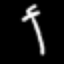

In [5]:
convert_values_to_image(training_letters_images.loc[0], True)

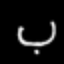

In [6]:
convert_values_to_image(training_letters_images.loc[12], True)

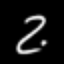

In [7]:
convert_values_to_image(training_letters_images.loc[37], True)

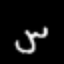

In [8]:
convert_values_to_image(training_letters_images.loc[3000], True)

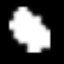

In [9]:
convert_values_to_image(training_digits_images.loc[0], True)

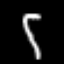

In [10]:
convert_values_to_image(training_digits_images.loc[2], True)

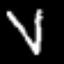

In [11]:
convert_values_to_image(training_digits_images.loc[7], True)

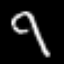

In [12]:
convert_values_to_image(training_digits_images.loc[9], True)

# II. Data Preprocessing

### 1. Image Normalization
We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [13]:
training_digits_images_scaled = training_digits_images.values.astype('float32')/255
training_digits_labels = training_digits_labels.values.astype('int32')
testing_digits_images_scaled = testing_digits_images.values.astype('float32')/255
testing_digits_labels = testing_digits_labels.values.astype('int32')

training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

In [14]:
print("Training images of digits after scaling")
print(training_digits_images_scaled.shape)
training_digits_images_scaled[0:5]

Training images of digits after scaling
(60000, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
print("Training images of letters after scaling")
print(training_letters_images_scaled.shape)
training_letters_images_scaled[0:5]

Training images of letters after scaling
(13440, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 2. Encoding Categorical Labels
From the labels csv files we can see that labels are categorical values and it is a multi-class classification problem. 

Our outputs are in the form of:
* Digits from 0 to 9 have categories numbers from 0 to 9
* Letters from ’أ’ to ’ي’ have categories numbers from 10 to 37

**Here we will encode these categories values using One Hot Encoding with keras.**

In [16]:
from keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
number_of_classes = 38
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)

In [17]:
print(training_digits_labels_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 3. Reshaping Input Images to 64x64x1


**we will reshape the input images to a 4D tensor with shape
(nb_samples, 64, 64 ,1)** as we use grayscale images of 64x64 pixels.

In [18]:
# reshape input digit images to 64x64x1
training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])

# reshape input letter images to 64x64x1
training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])

print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)
print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)

(60000, 64, 64, 1) (60000, 38) (10000, 64, 64, 1) (10000, 38)
(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)


### 3. Merging Letters and Digits Datasets

In [19]:
training_data_images = np.concatenate((training_digits_images_scaled, training_letters_images_scaled), axis=0) 
training_data_labels = np.concatenate((training_digits_labels_encoded, training_letters_labels_encoded), axis=0)
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)

testing_data_images = np.concatenate((testing_digits_images_scaled, testing_letters_images_scaled), axis=0) 
testing_data_labels = np.concatenate((testing_digits_labels_encoded, testing_letters_labels_encoded), axis=0)
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)

Total Training images are 73440 images of shape
(73440, 64, 64, 1) (73440, 38)
Total Testing images are 13360 images of shape
(13360, 64, 64, 1) (13360, 38)


# III. Implementation

### 1. Designing Model Architecture

Now we will make a method which creates the model architecture with the specified optimizer and activation functions.

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

In [22]:
def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
    # create model
    model = Sequential()
    
    model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling2D())
    
    #Fully connected final layer
    model.add(Dense(38, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return model

### 2. Model Summary And Visualization

Let's see the model summary.

In [23]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

Keras support plotting the model in keras.utils.vis_utils module which provides utility functions to plot a Keras model using graphviz.

To be able to use that utility we should first install pydot and graphviz modules. This can be done by running the following code cell then restart the runtime environment.

In [35]:
#pip install pydot

In [36]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
#pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=c7232cb4ecea4a2db4029c4aa63ac68c2c8e5cb9a6d3fc4bd9220d6e5461d43e
  Stored in directory: c:\users\baye2\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [28]:
#conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\baye2\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-22.9.0               |   py39haa95532_0         888 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b12b_4    

In [29]:
import pydot

Now we can plot the model and save it to a file also.

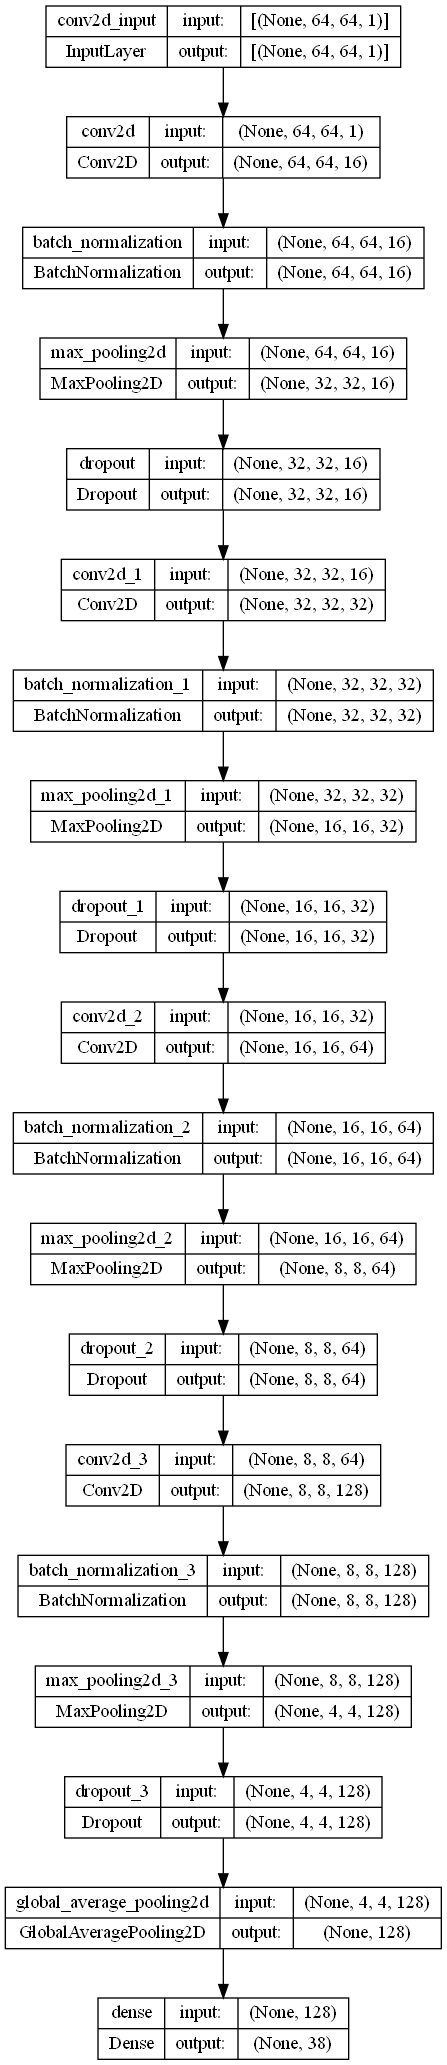

In [30]:
keras.utils.plot_model(model, show_shapes=True)

### 3. Parameters Tuning

We will tune the parameters optimizer, kernel_initializer and activation.

In [33]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
    parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


We will try different models with different parameters to find the best parameter values.

In [34]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
3672/3672 [==============================] - 335s 91ms/step - loss: 0.3336 - accuracy: 0.9081 - val_loss: 0.1678 - val_accuracy: 0.9499
Epoch 2/5
3672/3672 [==============================] - 331s 90ms/step - loss: 0.1096 - accuracy: 0.9666 - val_loss: 5.5979 - val_accuracy: 0.2045
Epoch 3/5
3672/3672 [==============================] - 329s 90ms/step - loss: 0.0885 - accuracy: 0.9726 - val_loss: 0.1147 - val_accuracy: 0.9662
Epoch 4/5
3672/3672 [==============================] - 330s 90ms/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 5/5
3672/3672 [==============================] - 328s 89ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.1835 - val_accuracy: 0.9465
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
3672/3672 [==============================] - 338s 92ms/step - loss: 0.3148 - accuracy: 0.9129 - val_l

Epoch 2/5
3672/3672 [==============================] - 213s 58ms/step - loss: 0.2539 - accuracy: 0.9221 - val_loss: 0.4741 - val_accuracy: 0.8507
Epoch 3/5
3672/3672 [==============================] - 215s 59ms/step - loss: 0.1856 - accuracy: 0.9428 - val_loss: 0.2621 - val_accuracy: 0.9112
Epoch 4/5
3672/3672 [==============================] - 213s 58ms/step - loss: 0.1519 - accuracy: 0.9528 - val_loss: 0.6575 - val_accuracy: 0.7971
Epoch 5/5
3672/3672 [==============================] - 214s 58ms/step - loss: 0.1320 - accuracy: 0.9579 - val_loss: 0.1186 - val_accuracy: 0.9618
{'optimizer': 'Adam', 'kernel_initializer': 'normal', 'activation': 'tanh'}
Epoch 1/5
3672/3672 [==============================] - 234s 64ms/step - loss: 0.4860 - accuracy: 0.8710 - val_loss: 1.9315 - val_accuracy: 0.4841
Epoch 2/5
3672/3672 [==============================] - 233s 63ms/step - loss: 0.1778 - accuracy: 0.9450 - val_loss: 0.2011 - val_accuracy: 0.9341
Epoch 3/5
3672/3672 [===========================

**From the above results we can see that best parameters are:**
* **Optimizer: Adam**
* **Kernel_initializer: uniform**
* **Activation: relu** 

Let's create the model with the best parameters obtained.

In [35]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')

### 4. Training the Model

#### Fitting the Model

Train the model using batch_size=20 to reduce used memory and make the training more quick.
We will train the model first on 10 epochs to see the accuracy that we will obtain.

In [36]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/10
3672/3672 [==============================] - ETA: 0s - loss: 0.3099 - accuracy: 0.9173
Epoch 1: val_loss improved from inf to 2.90024, saving model to weights.hdf5
3672/3672 [==============================] - 231s 63ms/step - loss: 0.3099 - accuracy: 0.9173 - val_loss: 2.9002 - val_accuracy: 0.3743
Epoch 2/10
3672/3672 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9700
Epoch 2: val_loss improved from 2.90024 to 1.40387, saving model to weights.hdf5
3672/3672 [==============================] - 226s 62ms/step - loss: 0.1003 - accuracy: 0.9700 - val_loss: 1.4039 - val_accuracy: 0.6069
Epoch 3/10
3672/3672 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.9761
Epoch 3: val_loss did not improve from 1.40387
3672/3672 [==============================] - 226s 61ms/step - loss: 0.0775 - accuracy: 0.9761 - val_loss: 1.5545 - val_accuracy: 0.5445
Epoch 4/10
3672/3672 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.

#### Plotting Loss and Accuracy Curves with Epochs

In [40]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

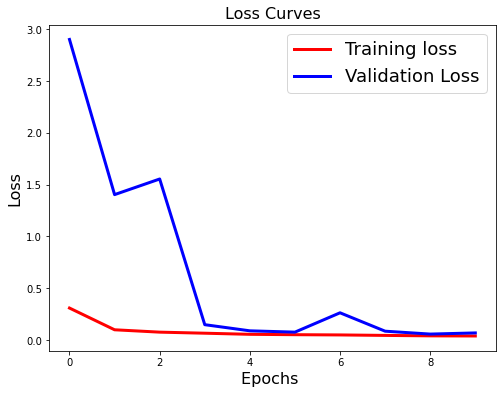

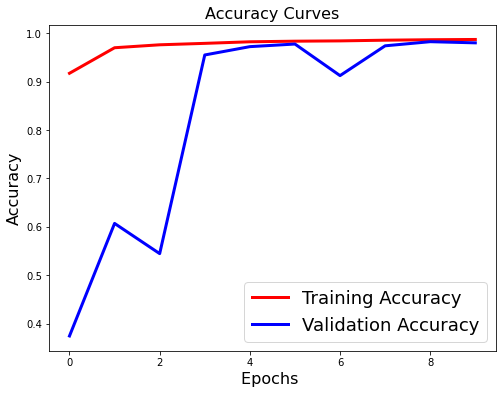

In [41]:
plot_loss_accuracy(history)

#### Load the Model with the Best Validation Loss

In [42]:
model.load_weights('weights.hdf5')

### 5. Test the Model

In [43]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

418/418 [==============================] - 16s 37ms/step - loss: 0.0588 - accuracy: 0.9826
Test Accuracy: 0.982559859752655
Test Loss: 0.05882362648844719


**We get test accuracy of 98.286% after training on 10 epochs only.**

**What about increasing the epochs we train on ?**

### 6. Training More on the best model

Epoch 1/20
3672/3672 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9871
Epoch 1: val_loss improved from inf to 0.09027, saving model to weights.hdf5
3672/3672 [==============================] - 350s 95ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0903 - val_accuracy: 0.9762
Epoch 2/20
3672/3672 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9878
Epoch 2: val_loss did not improve from 0.09027
3672/3672 [==============================] - 349s 95ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.7659 - val_accuracy: 0.7564
Epoch 3/20
3672/3672 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9881
Epoch 3: val_loss did not improve from 0.09027
3672/3672 [==============================] - 349s 95ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.2435 - val_accuracy: 0.9152
Epoch 4/20
3672/3672 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9889
Epoch 4: val_loss did not imp

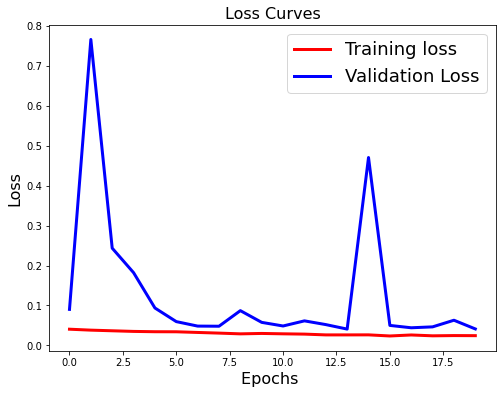

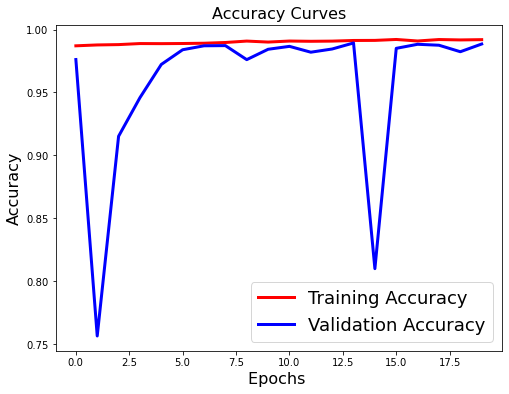

In [44]:
epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')
plot_loss_accuracy(history)

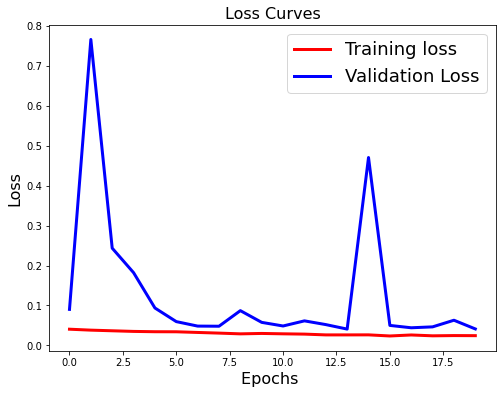

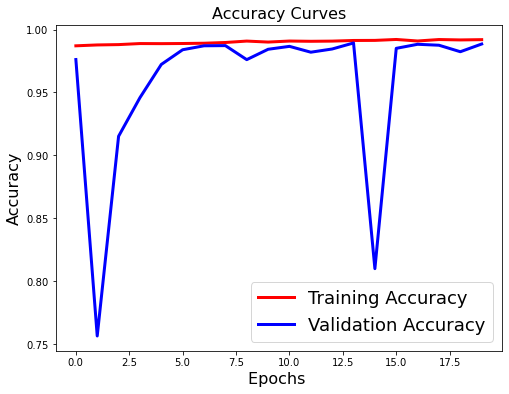

In [45]:
plot_loss_accuracy(history)

### 7. Testing the Model again

In [46]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

418/418 [==============================] - 16s 37ms/step - loss: 0.0409 - accuracy: 0.9894
Test Accuracy: 0.9893712401390076
Test Loss: 0.04094835743308067


After training the model on more epochs we gained a better model which can classify complex patterns . So when we tested it on our test dataset we had better results than before.

**Test accuracy is improved from 98.286% to 98.862% As we train the model on 20 more epochs.**



### 8. Saving the Final Model

Let's save the model on json format to be used later instead of creating the model again from scratch.

In [55]:
from keras.models import model_from_json

In [49]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Save the model weights to file.

In [50]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


if we want to load the model with the last obtained weights at anytime, we will run the following code cell.

In [57]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# compile the loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Loaded model from disk


# IV. Predict Image Classes

Making a method which takes a model, data and its true labels (optional for using in testing). Then it gives the predicted classes of the given data using the given model.

In [60]:
def get_predicted_classes(model, data, labels=None):
    image_predictions = model.predict(data)
    predicted_classes = np.argmax(image_predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    return predicted_classes, true_classes

### Evaluation Metrics

Making a method which will print all metrics (precision, recall, f1-score and support) with each class in the dataset.

In [61]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))

### Evaluating Final Model using the specified metrics

In [62]:
y_pred, y_true = get_predicted_classes(model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

418/418 [==============================] - 16s 36ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.99      1.00      0.99      1000
           2       0.99      0.99      0.99      1000
           3       1.00      1.00      1.00      1000
           4       1.00      0.99      1.00      1000
           5       0.99      0.99      0.99      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      0.99      1.00      1000
          10       0.99      1.00      1.00       120
          11       1.00      1.00      1.00       120
          12       0.94      0.97      0.95       120
          13       0.97      0.96      0.97       120
          14       0.97      1.00      0.98       120
          15       0.98      0.97      0.98       120
          16       1.00 

# V. A Demo to see how the model works on examples of the testing data

In [65]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
    non_zero_index = np.where(one_hot_encoding == 1)[0]
    assert(len(non_zero_index) == 1)
    non_zero_index = non_zero_index[0]
    return non_zero_index

In [66]:
def convert_categorical_label_to_real_label(categorical_label):
    real_labels = []
    real_labels.extend([x for x in range(10)])
    real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
    return real_labels[categorical_label]

In [67]:
def show_example(sample_index):
    y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
    non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
    y_true = y_true[0]
    y_pred = y_pred[0]
    assert y_true == non_zero_index
    true_label = convert_categorical_label_to_real_label(y_true)
    predicted_label = convert_categorical_label_to_real_label(y_pred)
    print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
    return true_label == predicted_label

1/1 [==============================] - 0s 16ms/step
The following image has the written character '5' but the model predicted it as '5'


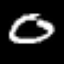

In [68]:
sample_index = 5
show_example(sample_index)
convert_values_to_image(testing_digits_images.loc[sample_index], True)

1/1 [==============================] - 0s 16ms/step
The following image has the written character 'ب' but the model predicted it as 'ب'


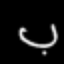

In [69]:
sample_index = 10002
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True)

1/1 [==============================] - 0s 40ms/step
The following image has the written character 'د' but the model predicted it as 'د'


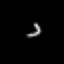

In [70]:
sample_index = 11414
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True)